<a href="https://colab.research.google.com/github/Carsonn-Chen/BINF-5220/blob/main/Liu_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 6: gradient descent and logistic regression

## Part 1: gradient descent

### Plot the 'loss1' loss function

In [41]:
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/BINF 5220/data')

from grad_desc_utils import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


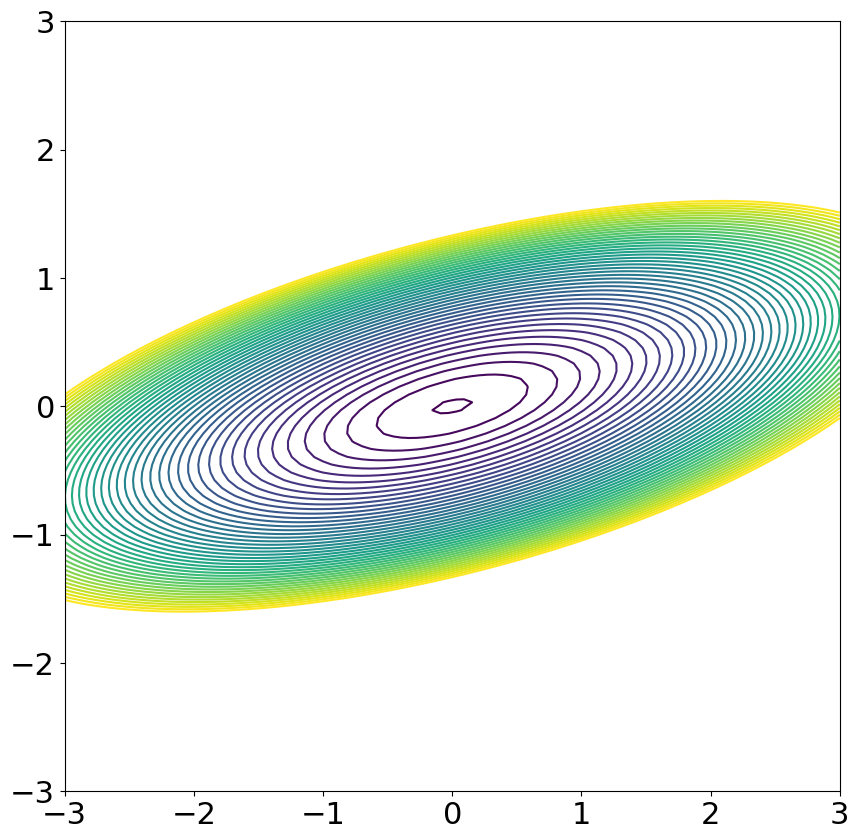

In [42]:
plot_loss_and_steps(loss1)

The minimum of loss1 function: (0,0)

### Do a gradient descent

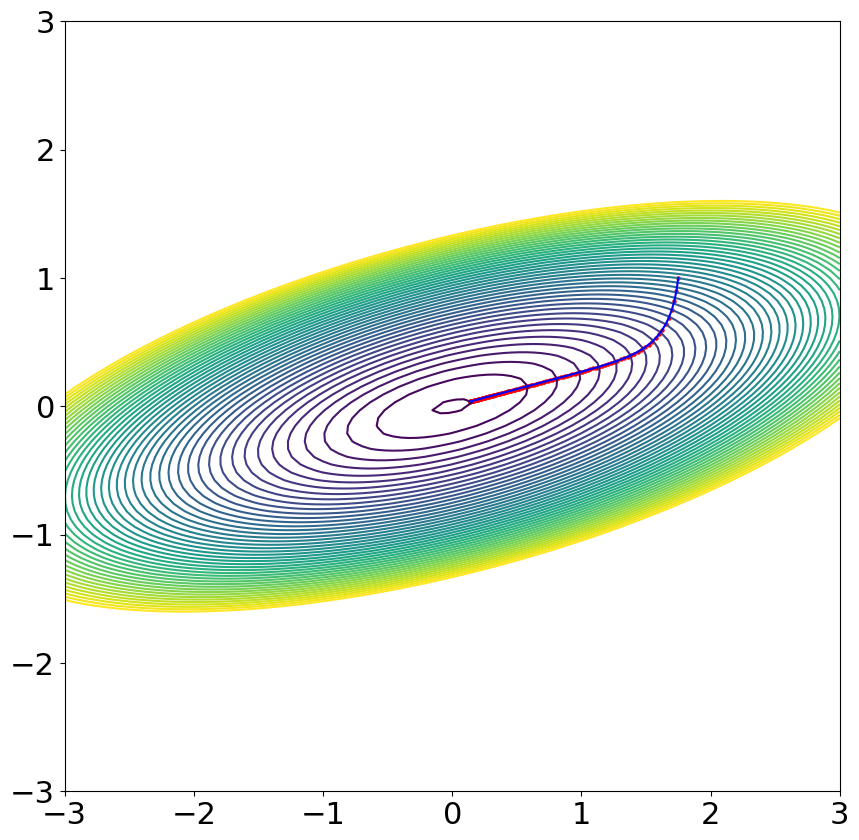

In [43]:
plot_loss_and_steps(loss1,do_grad_desc((1.75, 1.0),loss1_grad,0.01,130))

### increase values of eta

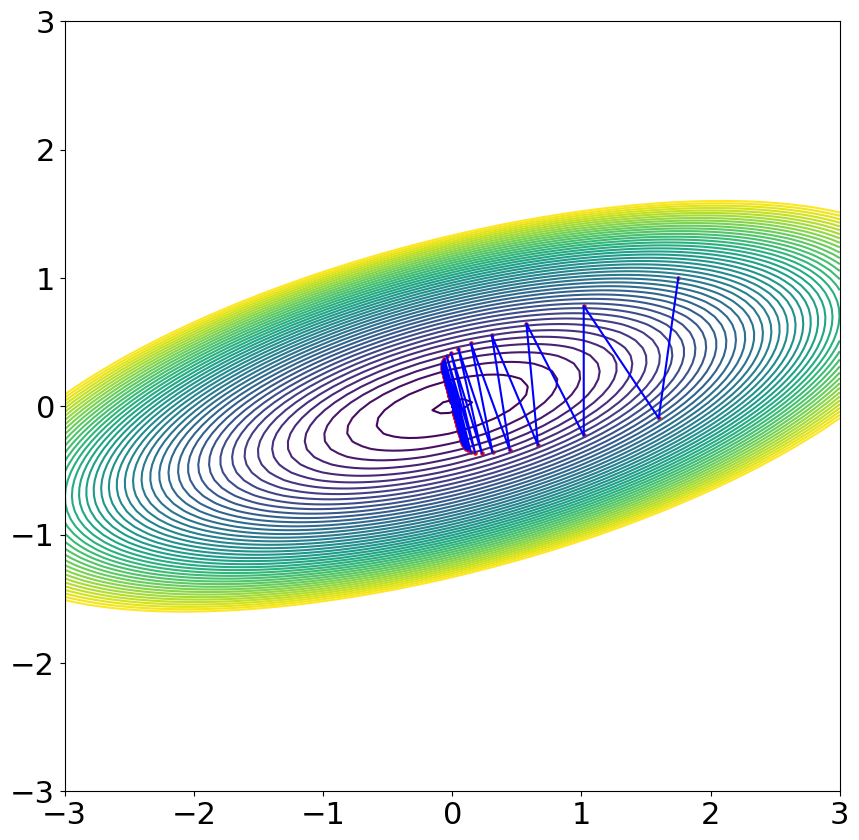

In [44]:
plot_loss_and_steps(loss1,do_grad_desc((1.75, 1.0),loss1_grad,0.11,130))

### adjust the number of steps

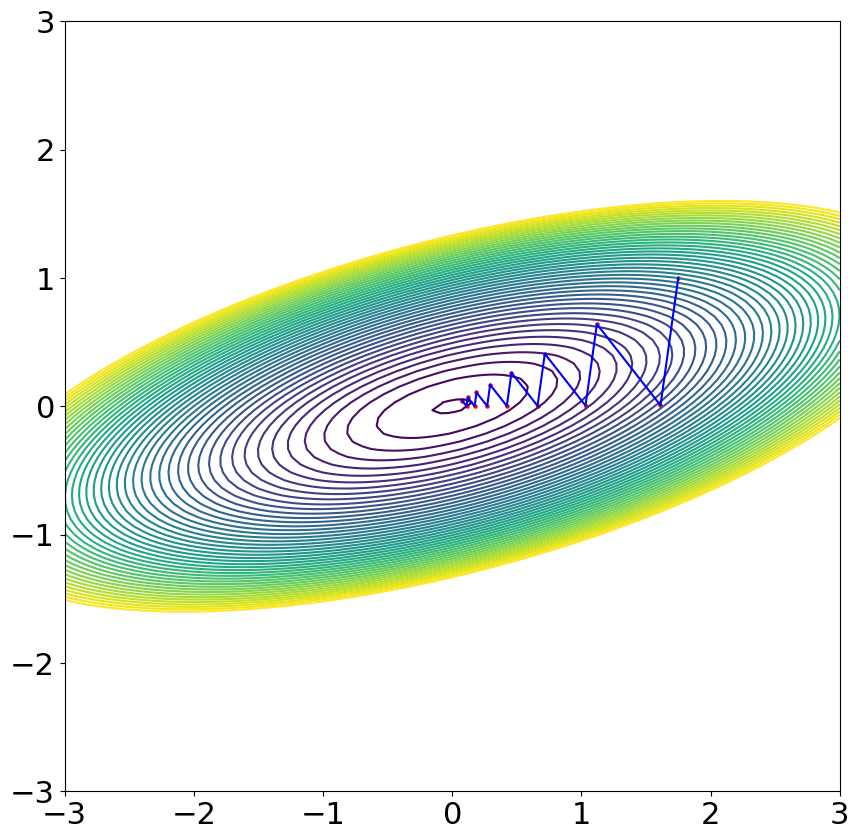

In [45]:
plot_loss_and_steps(loss1,do_grad_desc((1.75, 1.0),loss1_grad,0.10,14))

### reduce eta by a factor of 2

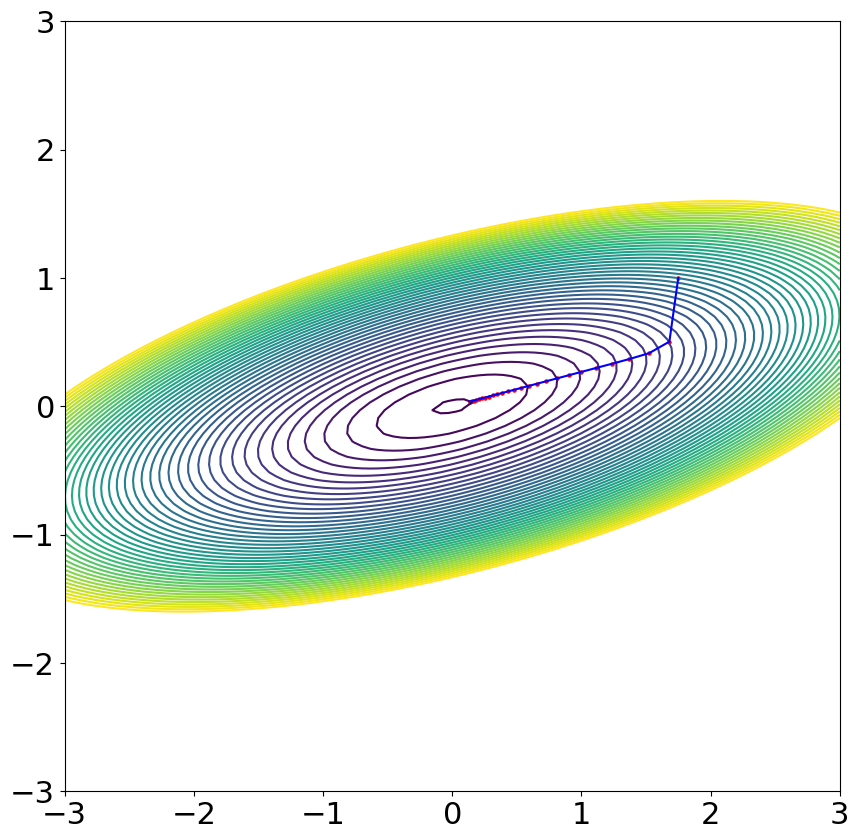

In [46]:
plot_loss_and_steps(loss1,do_grad_desc((1.75, 1.0),loss1_grad,0.05,25))

### Plot the 'loss2' loss function

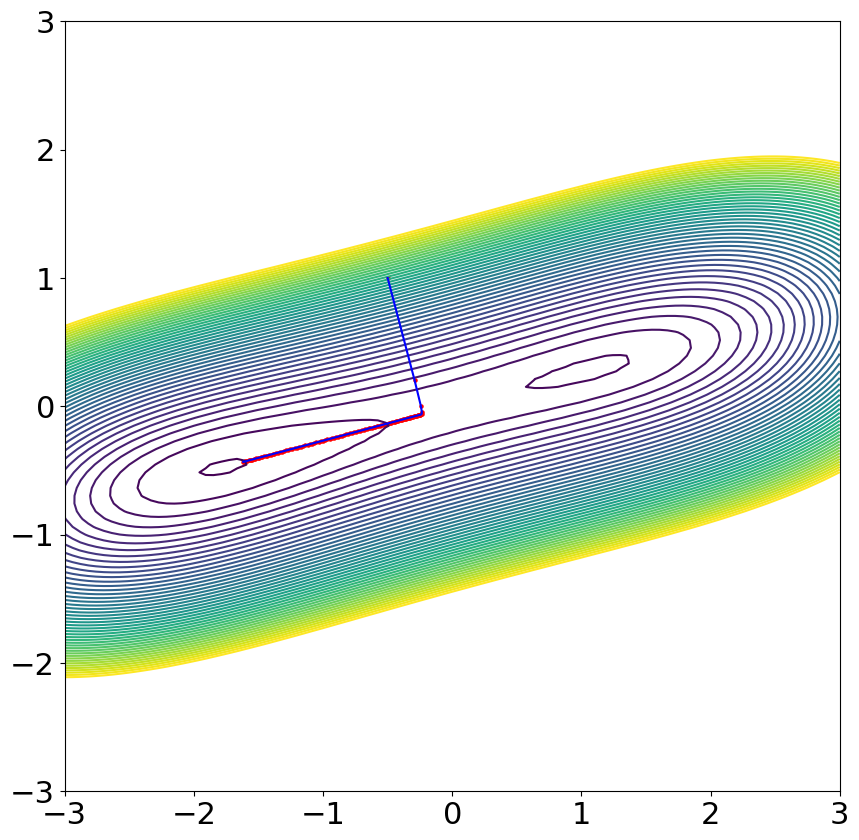

In [47]:
plot_loss_and_steps(loss2,do_grad_desc((-0.5, 1.0),loss2_grad,0.05,120))

### positions (-0.25, 1.0) and (0.0, 1.0)

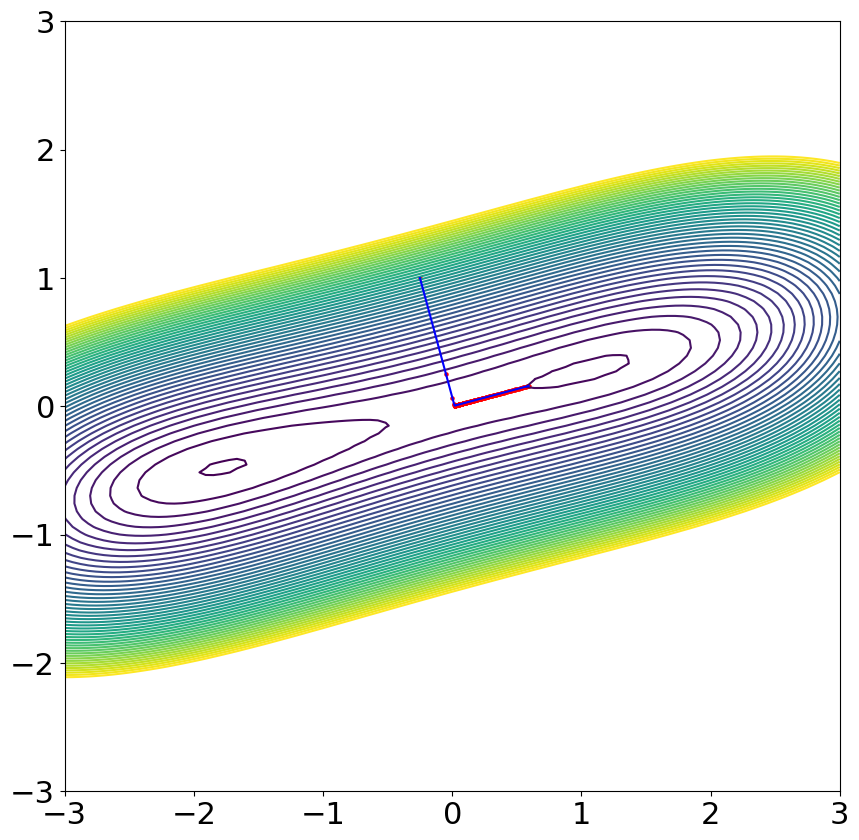

In [48]:
plot_loss_and_steps(loss2,do_grad_desc((-0.25, 1.0),loss2_grad,0.05,200))

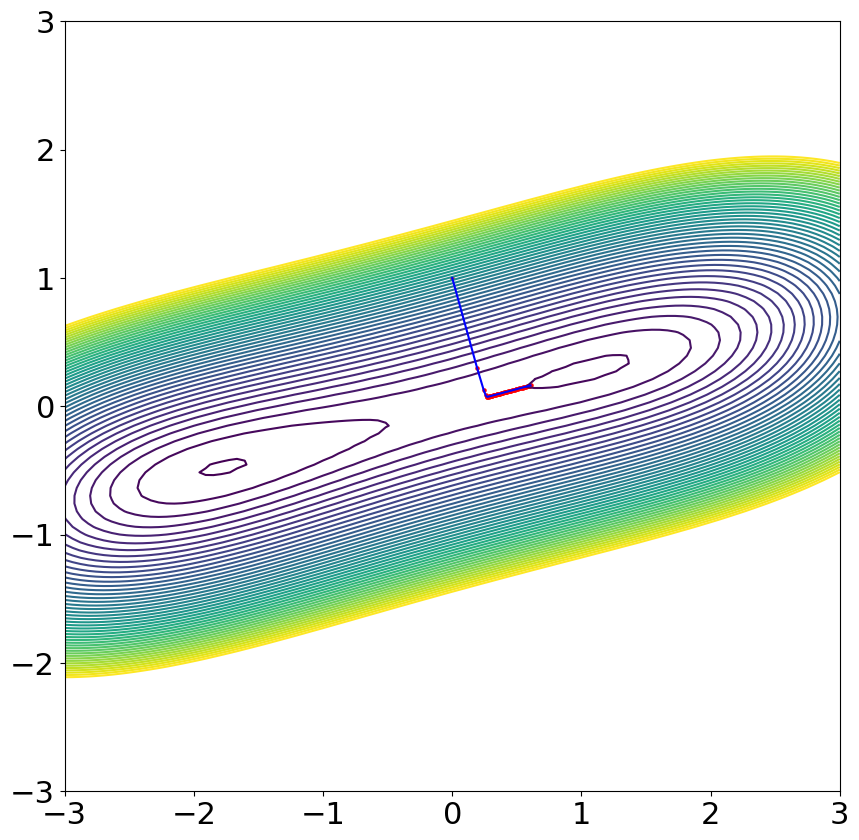

In [49]:
plot_loss_and_steps(loss2,do_grad_desc((0.0, 1.0),loss2_grad,0.05,60))

## Part 2: logistic regression

### import data

In [50]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

d = datasets.load_iris()
print(d.keys())
print(d.DESCR)
print(d.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

### split data

In [51]:
np.random.seed(5)
iris = pd.DataFrame(d.data)
iris.columns = d.feature_names
iris['target'] = d.target
print(iris)
fit, test = train_test_split(iris, test_size = 1/3)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

### 2 feature arrays

In [52]:
fit_features = fit[['sepal length (cm)','petal length (cm)']].values
fit_target = (fit['target'].values == 1).astype('int')
print(fit['target'].values)
print(fit_target)
test_features = test[['sepal length (cm)','petal length (cm)']].values
test_target = (test['target'].values == 1).astype('int')
print(test['target'].values)
print(test_target)

[2 0 0 0 0 1 1 1 1 2 1 2 2 1 0 1 0 1 2 1 2 1 2 1 1 1 2 1 0 2 0 0 1 0 0 2 1
 0 2 0 2 1 0 0 2 1 1 0 0 2 1 1 0 1 2 1 0 1 2 2 2 2 0 0 1 2 0 1 0 0 2 1 2 0
 2 0 2 0 1 0 2 2 0 2 2 2 1 0 1 0 0 1 2 0 2 0 1 2 2 1]
[0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1]
[1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2 0 2 2 1 0 0 1 2 1 2 2 0]
[1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0]


### fit and plot

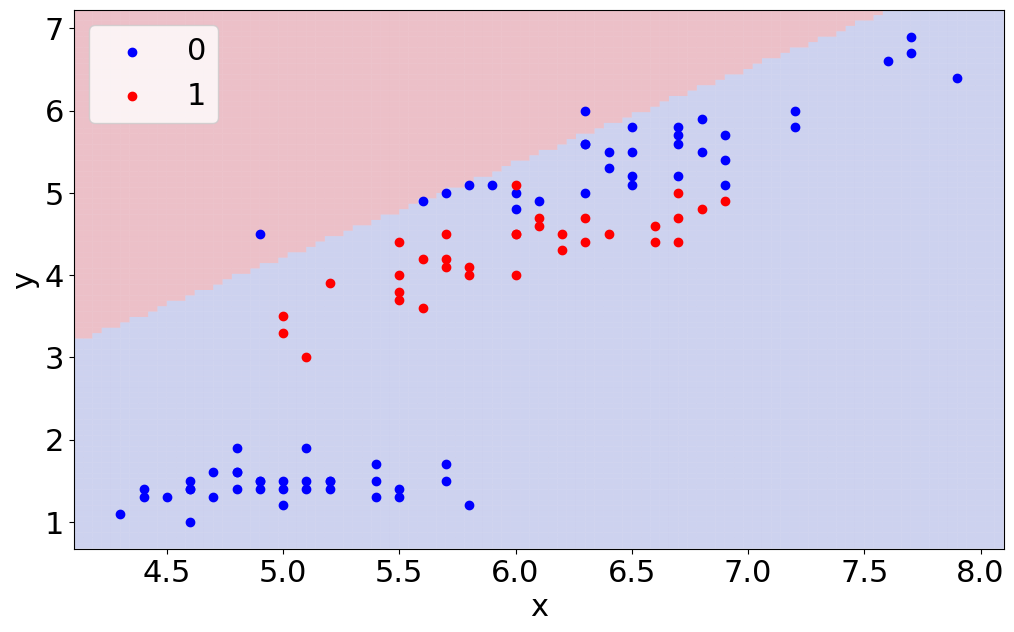

In [53]:
model = LogisticRegression()
model.fit(fit_features, fit_target)

plot_2d_data_and_prediction(model,fit_features,fit_target)

It is not good. The decision boundary does not separate the red dots.

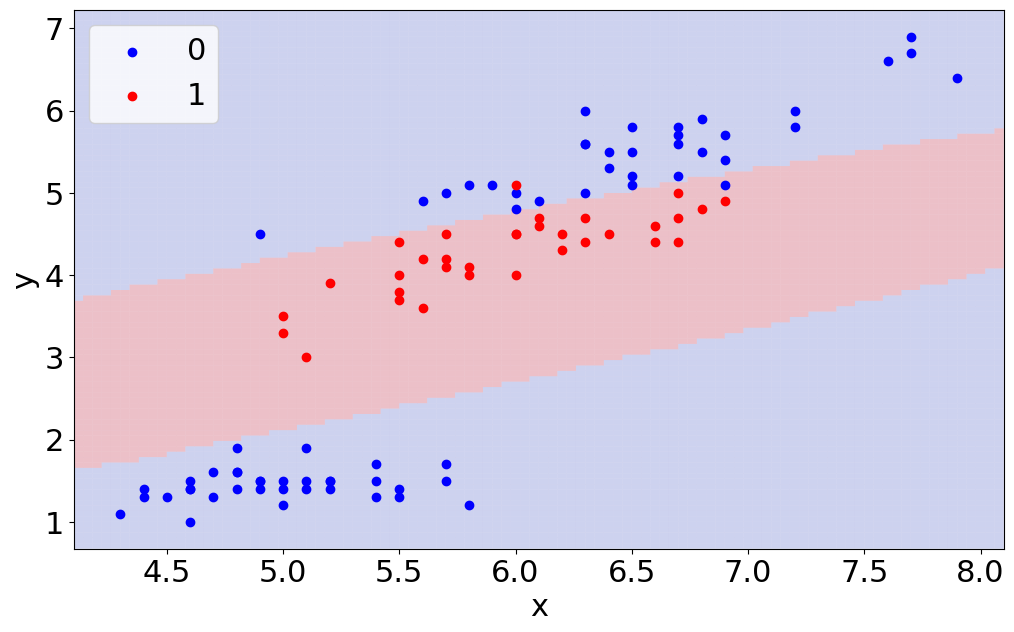

In [54]:
model2 = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(max_iter=1000))
model2.fit(fit_features, fit_target)

plot_2d_data_and_prediction(model2, fit_features, fit_target)

It is good. The red area contains most of the red dots. It gives a clear classification of the dots.

### score

In [55]:
print("LogisticRegression Score:")
print(model.score(test_features, test_target))
print("LogisticRegression(Degree=2) Score:")
print(model2.score(test_features, test_target))

LogisticRegression Score:
0.64
LogisticRegression(Degree=2) Score:
0.92


More complex boundaries can be handled by higher degree. In contrast to the situation where it must be fitted, if there is merely a linear fit, the boundary is a straight line. The greater score results from the higher-degree equation's solution to the issue of only one area having target points.

### Full 4-feature fit

In [56]:
full_fit_features = fit[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values
full_test_features = test[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values

full_model = LogisticRegression()
full_model.fit(full_fit_features, fit_target)
full_model.score(full_test_features,test_target)

0.68

Because it contains more data, fitting with full information is superior to fitting with two features. However, it is not as good as a quadratic fit with two features because the data from the two additional features is linear with the data from the other two features. While it is much lower than the quadratic model, the entire information score is in close proximity to the two characteristics. Similar to PCA, some features of the whole information can be obtained from two-dimensional data; hence, it acts similarly to the two-feature model but significantly differs from quadratic fitting. A more qualitative change technique for this fitting is quadratic fitting, which is necessary to separate the needed points on two dimensions.